In [1]:
import pandas as pd
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols=None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace: 'bool' = False,
    skiprows=None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    skip_blank_lines: 'bool' = True,
    parse_dates: 'bool | Sequence[Hashable] | None' = None,
    infer_datetime_format: 'bool | lib.NoDefault' = <no_default>,
    keep_date_col: 'bool' =

In [2]:
# read_csv() Alle na_values = <Symbol> werden mit NaN gefüllt
df = pd.read_csv('git/bootcamp/data/gfmt_sleep.csv', na_values="*")

In [3]:
# Gibt die ersten 5 Zeilen des Dataframes aus 
df.head()

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence when incorrect hit,confidence when correct reject,confidence when incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
0,8,f,39,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2
1,16,m,42,90,90,90.0,75.5,55.5,70.5,50.0,75.0,50.0,4,11,7
2,18,f,31,90,95,92.5,89.5,90.0,86.0,81.0,89.0,88.0,10,9,3
3,22,f,35,100,75,87.5,89.5,NaN,71.0,80.0,88.0,80.0,13,8,20
4,27,f,74,60,65,62.5,68.5,49.0,61.0,49.0,65.0,49.0,13,9,12


In [4]:
type(df)


pandas.core.frame.DataFrame

In [5]:
# QUick and dirty
df['percent correct'][4]

62.5

In [6]:
# Eigenschaft von Dataframe mit 
df.loc[4,'percent correct']#Label und Spalte

62.5

In [7]:
# Labelung über einen Boolschen Ausdruck
# Zugriff auf einzelnen Wert
df.loc[df['participant number']==4, 'percent correct']

28    67.5
Name: percent correct, dtype: float64

In [8]:
# Labelung über Boolsche Indexierung
# Zugriff auf die komplette Zeile über Slicing
df.loc[df['participant number']==4, 'percent correct']
df.loc[df['participant number']==4, :]

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence when incorrect hit,confidence when correct reject,confidence when incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
28,4,f,21,70,65,67.5,63.5,64.0,50.0,50.0,60.0,50.0,26,5,4


In [9]:
# Boolsche Indexierung
df.loc[(df['age'] < 21) & (df['gender'] == 'f')]


,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence when incorrect hit,confidence when correct reject,confidence when incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
27,3,f,16,70,80,75.0,70.0,57.0,54.0,53.0,57.0,54.5,23,1,3
29,5,f,18,90,100,95.0,76.5,83.0,80.0,NaN,80.0,83.0,21,7,5
66,58,f,16,85,85,85.0,55.0,30.0,50.0,40.0,52.5,35.0,29,2,11
79,72,f,18,80,75,77.5,67.5,51.5,66.0,57.0,67.0,53.0,29,4,6
88,85,f,18,85,85,85.0,93.0,92.0,91.0,89.0,91.5,91.0,25,4,21


In [10]:
# Boolsche Indexierung und Zuweisung in die Variable inds
inds = (df['age'] < 30) & (df['gender'] == "f") & (df['percent correct'] > 85)


In [11]:
inds

0      False
1      False
2      False
3      False
4      False
       ...  
97     False
98     False
99     False
100    False
101    False
Length: 102, dtype: bool

In [12]:
# Anzeige der Variable über die Eingeschaft loc des Dataframes
df.loc[inds,:]

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence when incorrect hit,confidence when correct reject,confidence when incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
22,93,f,28,100,75,87.5,89.5,NaN,67.0,60.0,80.0,60.0,16,7,4
29,5,f,18,90,100,95.0,76.5,83.0,80.0,NaN,80.0,83.0,21,7,5
30,6,f,28,95,80,87.5,100.0,85.0,94.0,61.0,99.0,65.0,19,7,12
33,10,f,25,100,100,100.0,90.0,NaN,85.0,NaN,90.0,NaN,17,10,11
56,44,f,21,85,90,87.5,66.0,29.0,70.0,29.0,67.0,29.0,26,7,18
58,48,f,23,90,85,87.5,67.0,47.0,69.0,40.0,67.0,40.0,18,6,8
60,51,f,24,85,95,90.0,97.0,41.0,74.0,73.0,83.0,55.5,29,1,7
75,67,f,25,100,100,100.0,61.5,NaN,58.5,NaN,60.5,NaN,28,8,9


In [13]:
# 
for i, r in df.iterrows():
    print(i,r)

0 participant number                     8
gender                                 f
age                                   39
correct hit percentage                65
correct reject percentage             80
percent correct                     72.5
confidence when correct hit         91.0
confidence when incorrect hit       90.0
confidence when correct reject      93.0
confidence when incorrect reject    83.5
confidence when correct             93.0
confidence when incorrect           90.0
sci                                    9
psqi                                  13
ess                                    2
Name: 0, dtype: object
1 participant number                    16
gender                                 m
age                                   42
correct hit percentage                90
correct reject percentage             90
percent correct                     90.0
confidence when correct hit         75.5
confidence when incorrect hit       55.5
confidence when correct reject

In [14]:
df['sci']<16

0       True
1       True
2       True
3       True
4       True
       ...  
97     False
98     False
99     False
100    False
101    False
Name: sci, Length: 102, dtype: bool

In [15]:
# Vektorisierung
# Erschaffung einer neuen Spalte mit boolschen Werten für diese Bedingung
df['insomnia']=df['sci'] <= 16

In [16]:
df['insomnia']

0       True
1       True
2       True
3       True
4       True
       ...  
97     False
98     False
99     False
100    False
101    False
Name: insomnia, Length: 102, dtype: bool

In [17]:
df.head()


,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence when incorrect hit,confidence when correct reject,confidence when incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess,insomnia
0,8,f,39,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2,True
1,16,m,42,90,90,90.0,75.5,55.5,70.5,50.0,75.0,50.0,4,11,7,True
2,18,f,31,90,95,92.5,89.5,90.0,86.0,81.0,89.0,88.0,10,9,3,True
3,22,f,35,100,75,87.5,89.5,NaN,71.0,80.0,88.0,80.0,13,8,20,True
4,27,f,74,60,65,62.5,68.5,49.0,61.0,49.0,65.0,49.0,13,9,12,True


In [18]:
df['female']= df['gender'] == 'f'

In [19]:
df.head()

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence when incorrect hit,confidence when correct reject,confidence when incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess,insomnia,female
0,8,f,39,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2,True,True
1,16,m,42,90,90,90.0,75.5,55.5,70.5,50.0,75.0,50.0,4,11,7,True,False
2,18,f,31,90,95,92.5,89.5,90.0,86.0,81.0,89.0,88.0,10,9,3,True,True
3,22,f,35,100,75,87.5,89.5,NaN,71.0,80.0,88.0,80.0,13,8,20,True,True
4,27,f,74,60,65,62.5,68.5,49.0,61.0,49.0,65.0,49.0,13,9,12,True,True


In [20]:
import numpy as np

In [21]:
insomniacs = np.mean(df.loc[df['insomnia'],'percent correct'])
non_insomniacs = np.mean(df.loc[~df['insomnia'],'percent correct'])

In [22]:
print(insomniacs, non_insomniacs)

76.1 81.46103896103897


In [23]:
df

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence when incorrect hit,confidence when correct reject,confidence when incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess,insomnia,female
0,8,f,39,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2,True,True
1,16,m,42,90,90,90.0,75.5,55.5,70.5,50.0,75.0,50.0,4,11,7,True,False
2,18,f,31,90,95,92.5,89.5,90.0,86.0,81.0,89.0,88.0,10,9,3,True,True
3,22,f,35,100,75,87.5,89.5,NaN,71.0,80.0,88.0,80.0,13,8,20,True,True
4,27,f,74,60,65,62.5,68.5,49.0,61.0,49.0,65.0,49.0,13,9,12,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,97,f,23,70,85,77.5,77.0,66.5,77.0,77.5,77.0,74.0,20,8,10,False,True
98,98,f,70,90,85,87.5,65.5,85.5,87.0,80.0,74.0,80.0,19,8,7,False,True
99,99,f,24,70,80,75.0,61.5,81.0,70.0,61.0,65.0,81.0,31,2,15,False,True
100,102,f,40,75,65,70.0,53.0,37.0,84.0,52.0,81.0,51.0,22,4,7,False,True


In [24]:
df.describe()

,participant number,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence when incorrect hit,confidence when correct reject,confidence when incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,84.000000,102.000000,93.000000,102.000000,99.000000,102.000000,102.000000,102.000000
mean,52.049020,37.921569,83.088235,77.205882,80.147059,74.990196,58.565476,71.137255,61.220430,74.642157,61.979798,22.245098,5.274510,7.294118
std,30.020909,14.029450,15.091210,17.569854,12.047881,14.165916,19.560653,14.987479,17.671283,13.619725,15.921670,7.547128,3.404007,4.426715
min,1.000000,16.000000,35.000000,20.000000,40.000000,29.500000,7.000000,19.000000,17.000000,24.000000,24.500000,0.000000,0.000000,0.000000
25%,26.250000,26.500000,75.000000,70.000000,72.500000,66.000000,46.375000,64.625000,50.000000,66.000000,51.000000,17.000000,3.000000,4.000000
50%,52.500000,36.500000,90.000000,80.000000,83.750000,75.000000,56.250000,71.250000,61.000000,75.750000,61.500000,23.500000,5.000000,7.000000
75%,77.750000,45.000000,95.000000,90.000000,87.500000,86.500000,73.500000,80.000000,74.000000,82.375000,73.000000,29.000000,7.000000,10.000000
max,103.000000,74.000000,100.000000,100.000000,100.000000,100.000000,92.000000,100.000000,100.000000,100.000000,100.000000,32.000000,15.000000,21.000000


In [25]:
df.describe().loc['max',:]

participant number                  103.0
age                                  74.0
correct hit percentage              100.0
correct reject percentage           100.0
percent correct                     100.0
confidence when correct hit         100.0
confidence when incorrect hit        92.0
confidence when correct reject      100.0
confidence when incorrect reject    100.0
confidence when correct             100.0
confidence when incorrect           100.0
sci                                  32.0
psqi                                 15.0
ess                                  21.0
Name: max, dtype: float64

In [26]:
df

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence when incorrect hit,confidence when correct reject,confidence when incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess,insomnia,female
0,8,f,39,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2,True,True
1,16,m,42,90,90,90.0,75.5,55.5,70.5,50.0,75.0,50.0,4,11,7,True,False
2,18,f,31,90,95,92.5,89.5,90.0,86.0,81.0,89.0,88.0,10,9,3,True,True
3,22,f,35,100,75,87.5,89.5,NaN,71.0,80.0,88.0,80.0,13,8,20,True,True
4,27,f,74,60,65,62.5,68.5,49.0,61.0,49.0,65.0,49.0,13,9,12,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,97,f,23,70,85,77.5,77.0,66.5,77.0,77.5,77.0,74.0,20,8,10,False,True
98,98,f,70,90,85,87.5,65.5,85.5,87.0,80.0,74.0,80.0,19,8,7,False,True
99,99,f,24,70,80,75.0,61.5,81.0,70.0,61.0,65.0,81.0,31,2,15,False,True
100,102,f,40,75,65,70.0,53.0,37.0,84.0,52.0,81.0,51.0,22,4,7,False,True


In [27]:
df.to_csv('gfmt_sleep_with_insomnia.csv', index=False)


In [28]:
df.columns

Index(['participant number', 'gender', 'age', 'correct hit percentage',
       'correct reject percentage', 'percent correct',
       'confidence when correct hit', 'confidence when incorrect hit',
       'confidence when correct reject', 'confidence when incorrect reject',
       'confidence when correct', 'confidence when incorrect', 'sci', 'psqi',
       'ess', 'insomnia', 'female'],
      dtype='object')

In [29]:
df.isnull

<bound method DataFrame.isnull of      participant number gender  age  correct hit percentage   
0                     8      f   39                      65  \
1                    16      m   42                      90   
2                    18      f   31                      90   
3                    22      f   35                     100   
4                    27      f   74                      60   
..                  ...    ...  ...                     ...   
97                   97      f   23                      70   
98                   98      f   70                      90   
99                   99      f   24                      70   
100                 102      f   40                      75   
101                 103      f   33                      85   

     correct reject percentage  percent correct  confidence when correct hit   
0                           80             72.5                         91.0  \
1                           90             90.0  

In [30]:
df.isnull().sum()

participant number                   0
gender                               0
age                                  0
correct hit percentage               0
correct reject percentage            0
percent correct                      0
confidence when correct hit          0
confidence when incorrect hit       18
confidence when correct reject       0
confidence when incorrect reject     9
confidence when correct              0
confidence when incorrect            3
sci                                  0
psqi                                 0
ess                                  0
insomnia                             0
female                               0
dtype: int64

In [31]:
df.fillna("Dummy-Wert",inplace=True)

In [32]:
df

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence when incorrect hit,confidence when correct reject,confidence when incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess,insomnia,female
0,8,f,39,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2,True,True
1,16,m,42,90,90,90.0,75.5,55.5,70.5,50.0,75.0,50.0,4,11,7,True,False
2,18,f,31,90,95,92.5,89.5,90.0,86.0,81.0,89.0,88.0,10,9,3,True,True
3,22,f,35,100,75,87.5,89.5,Dummy-Wert,71.0,80.0,88.0,80.0,13,8,20,True,True
4,27,f,74,60,65,62.5,68.5,49.0,61.0,49.0,65.0,49.0,13,9,12,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,97,f,23,70,85,77.5,77.0,66.5,77.0,77.5,77.0,74.0,20,8,10,False,True
98,98,f,70,90,85,87.5,65.5,85.5,87.0,80.0,74.0,80.0,19,8,7,False,True
99,99,f,24,70,80,75.0,61.5,81.0,70.0,61.0,65.0,81.0,31,2,15,False,True
100,102,f,40,75,65,70.0,53.0,37.0,84.0,52.0,81.0,51.0,22,4,7,False,True


In [33]:
df.shape

(102, 17)

In [34]:
df['age'].value_counts().tail(10)

age
37    1
47    1
69    1
54    1
67    1
50    1
38    1
64    1
19    1
70    1
Name: count, dtype: int64

In [35]:
df[['age','gender']].head()

,age,gender
0,39,f
1,42,m
2,31,f
3,35,f
4,74,f


In [36]:
df.loc[2:4]

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence when incorrect hit,confidence when correct reject,confidence when incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess,insomnia,female
2,18,f,31,90,95,92.5,89.5,90.0,86.0,81.0,89.0,88.0,10,9,3,True,True
3,22,f,35,100,75,87.5,89.5,Dummy-Wert,71.0,80.0,88.0,80.0,13,8,20,True,True
4,27,f,74,60,65,62.5,68.5,49.0,61.0,49.0,65.0,49.0,13,9,12,True,True


In [37]:
def male_gender(param):
    if param == "m":
        return "male"
    else:
        return "female"


df['gender'] = df['gender'].apply(male_gender)


In [38]:
df

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence when incorrect hit,confidence when correct reject,confidence when incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess,insomnia,female
0,8,female,39,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2,True,True
1,16,male,42,90,90,90.0,75.5,55.5,70.5,50.0,75.0,50.0,4,11,7,True,False
2,18,female,31,90,95,92.5,89.5,90.0,86.0,81.0,89.0,88.0,10,9,3,True,True
3,22,female,35,100,75,87.5,89.5,Dummy-Wert,71.0,80.0,88.0,80.0,13,8,20,True,True
4,27,female,74,60,65,62.5,68.5,49.0,61.0,49.0,65.0,49.0,13,9,12,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,97,female,23,70,85,77.5,77.0,66.5,77.0,77.5,77.0,74.0,20,8,10,False,True
98,98,female,70,90,85,87.5,65.5,85.5,87.0,80.0,74.0,80.0,19,8,7,False,True
99,99,female,24,70,80,75.0,61.5,81.0,70.0,61.0,65.0,81.0,31,2,15,False,True
100,102,female,40,75,65,70.0,53.0,37.0,84.0,52.0,81.0,51.0,22,4,7,False,True


In [39]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 8)}) # setze Schriftart und vergrößert die Plotgröße

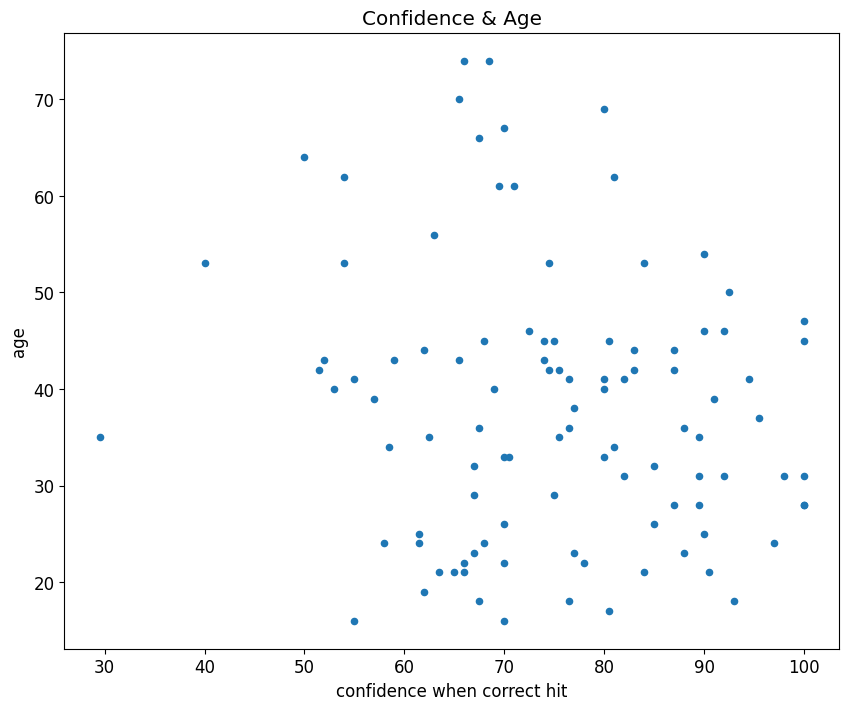

In [40]:
df.plot(kind="scatter", x='confidence when correct hit',
        y='age', title="Confidence & Age");


In [41]:
df

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence when incorrect hit,confidence when correct reject,confidence when incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess,insomnia,female
0,8,female,39,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2,True,True
1,16,male,42,90,90,90.0,75.5,55.5,70.5,50.0,75.0,50.0,4,11,7,True,False
2,18,female,31,90,95,92.5,89.5,90.0,86.0,81.0,89.0,88.0,10,9,3,True,True
3,22,female,35,100,75,87.5,89.5,Dummy-Wert,71.0,80.0,88.0,80.0,13,8,20,True,True
4,27,female,74,60,65,62.5,68.5,49.0,61.0,49.0,65.0,49.0,13,9,12,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,97,female,23,70,85,77.5,77.0,66.5,77.0,77.5,77.0,74.0,20,8,10,False,True
98,98,female,70,90,85,87.5,65.5,85.5,87.0,80.0,74.0,80.0,19,8,7,False,True
99,99,female,24,70,80,75.0,61.5,81.0,70.0,61.0,65.0,81.0,31,2,15,False,True
100,102,female,40,75,65,70.0,53.0,37.0,84.0,52.0,81.0,51.0,22,4,7,False,True
